##  作图 幅度谱 和 相位谱
我们可以使用 Python 的 NumPy 和 Matplotlib 库来绘制信号的幅度谱和相位谱。以下是一个示例，展示了如何创建一个简单的正弦信号并绘制其幅度谱和相位谱。

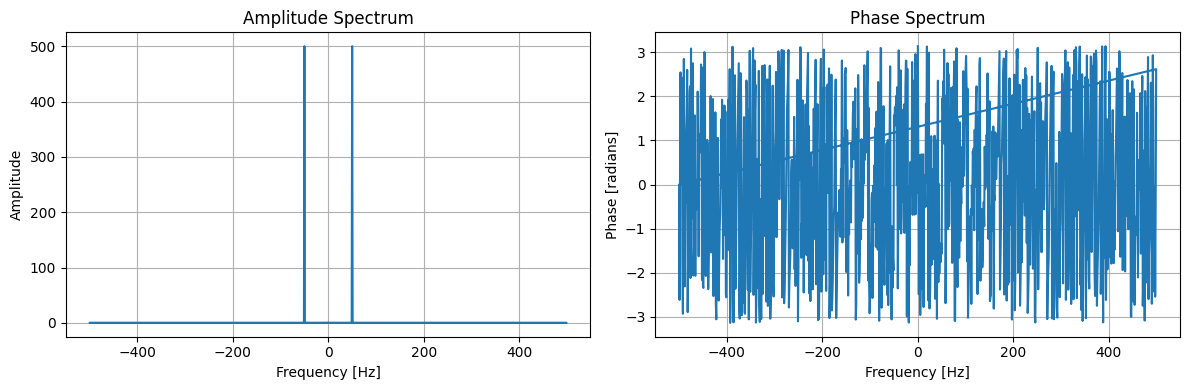

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一个简单的正弦信号
fs = 1000  # 采样频率
t = np.arange(0, 1, 1/fs)  # 时间向量
f1 = 50  # 信号频率
x = np.sin(2 * np.pi * f1 * t)  # 正弦信号

# 计算信号的频域表示（快速傅里叶变换）
X = np.fft.fft(x)

# 计算幅度谱和相位谱
freqs = np.fft.fftfreq(len(x), 1/fs)
amplitude_spectrum = np.abs(X)
phase_spectrum = np.angle(X)

# 绘制幅度谱
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(freqs, amplitude_spectrum)
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()

# 绘制相位谱
plt.subplot(1, 2, 2)
plt.plot(freqs, phase_spectrum)
plt.title('Phase Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid()

plt.tight_layout()
plt.show()


In [3]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 生成信号
fs = 1000  # 采样频率
t = np.linspace(0, 1, fs)
f1 = 5  # 第一个正弦波的频率
f2 = 50  # 第二个正弦波的频率
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# 计算傅里叶变换
freqs = np.fft.fftfreq(fs, 1/fs)
fft_signal = np.fft.fft(signal)

# 提取幅度谱和相位谱
amplitude_spectrum = np.abs(fft_signal)
phase_spectrum = np.angle(fft_signal)

# 创建动画
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

def update(num, signal, amplitude_spectrum, phase_spectrum, ax1, ax2):
    ax1.clear()
    ax1.plot(signal[:num])
    ax1.set_xlim(0, len(signal))
    ax1.set_ylim(-2, 2)
    ax1.set_title('Time Domain Signal')

    ax2.clear()
    ax2.plot(freqs[:fs//2], amplitude_spectrum[:fs//2], label='Amplitude Spectrum')
    ax2.plot(freqs[:fs//2], phase_spectrum[:fs//2], label='Phase Spectrum', linestyle='--')
    ax2.set_xlim(0, fs//2)
    ax2.set_ylim(0, max(amplitude_spectrum))
    ax2.set_title('Frequency Domain')
    ax2.legend()

ani = FuncAnimation(fig, update, frames=range(len(signal)), fargs=(signal, amplitude_spectrum, phase_spectrum, ax1, ax2))
plt.show()


In [4]:
'''
作图 相位谱  动态图

'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 生成一个模拟信号
def generate_signal(t, freqs, phases):
    signal = np.zeros_like(t)
    for freq, phase in zip(freqs, phases):
        signal += np.sin(2 * np.pi * freq * t + phase)
    return signal

# 计算相位谱
def phase_spectrum(signal, freqs):
    n = len(signal)
    phase_spec = np.zeros_like(freqs)
    for i, freq in enumerate(freqs):
        complex_coeff = np.sum(signal * np.exp(-1j * 2 * np.pi * freq * t))
        phase_spec[i] = np.angle(complex_coeff)
    return phase_spec

# 设置参数
fs = 1000  # 采样率
duration = 1  # 信号持续时间
t = np.arange(0, duration, 1 / fs)
freqs = np.linspace(0, 30, 100)
signal_freqs = [5, 10, 15]
signal_phases = [0, np.pi / 4, np.pi / 2]

# 生成信号
signal = generate_signal(t, signal_freqs, signal_phases)

# 创建动画
fig, ax = plt.subplots()
ax.set_xlim(0, max(freqs))
ax.set_ylim(-np.pi, np.pi)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Phase (rad)")
ax.set_title("Phase Spectrum")
line, = ax.plot([], [])

def update(frame):
    global signal_phases
    signal_phases = [phase + 0.1 for phase in signal_phases]
    new_signal = generate_signal(t, signal_freqs, signal_phases)
    phase_spec = phase_spectrum(new_signal, freqs)
    line.set_data(freqs, phase_spec)
    return line,

ani = FuncAnimation(fig, update, frames=range(100), interval=100, blit=True)
plt.show()


In [6]:
'''
作图 时域信号和 相位谱  动态图
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 设置信号参数
fs = 1000  # 采样频率
T = 1 / fs  # 采样间隔
L = 1000  # 信号长度
t = np.linspace(0, L - 1, L) * T  # 时间向量

# 创建信号
f = 5  # 信号频率
signal = np.sin(2 * np.pi * f * t)

# 计算信号的傅里叶变换
signal_fft = np.fft.fft(signal)

# 提取相位谱
phases = np.angle(signal_fft)

# 设置图形参数
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2)

# 设置动态图形更新函数
def update(num):
    signal_updated = np.sin(2 * np.pi * f * t + num * np.pi / 15)
    signal_fft_updated = np.fft.fft(signal_updated)
    phases_updated = np.angle(signal_fft_updated)

    ax1.clear()
    ax1.set_title('时域信号')
    ax1.set_xlabel('时间')
    ax1.set_ylabel('幅度')
    ax1.set_xlim(0, L * T)
    ax1.set_ylim(-1, 1)
    line1.set_data(t, signal_updated)

    ax2.clear()
    ax2.set_title('相位谱')
    ax2.set_xlabel('频率 (Hz)')
    ax2.set_ylabel('相位 (弧度)')
    ax2.set_xlim(0, fs // 2)
    ax2.set_ylim(-np.pi, np.pi)
    line2.set_data(np.linspace(0, fs // 2, L // 2), phases_updated[: L // 2])

    return line1, line2

# 创建动画
ani = FuncAnimation(fig, update, frames=30, interval=100, blit=True)
plt.show()


In [2]:
%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cv2


# 生成模拟信号
fs = 1000  # 采样频率
t = np.arange(0, 1, 1/fs)  # 时间向量
f1, f2 = 5, 50  # 频率
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# 计算相位谱
frequencies = np.fft.rfftfreq(len(t), 1/fs)  # 频率向量
fft_signal = np.fft.rfft(signal)  # 快速傅里叶变换
phase_spectrum = np.angle(fft_signal)  # 计算相位谱

# 创建画布
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
line1, = ax1.plot(t, signal)
ax1.set_title('时域信号')
ax1.set_xlabel('时间')
ax1.set_ylabel('幅值')
ax1.grid()

line2, = ax2.plot(frequencies, phase_spectrum)
ax2.set_title('相位谱')
ax2.set_xlabel('频率')
ax2.set_ylabel('相位角 (弧度)')
ax2.grid()

# 更新函数
def update(frame):
    # 更新时域信号
    signal_updated = np.sin(2 * np.pi * f1 * t + frame/10) + np.sin(2 * np.pi * f2 * t + frame/10)
    line1.set_ydata(signal_updated)

    # 更新相位谱
    fft_signal_updated = np.fft.rfft(signal_updated)
    phase_spectrum_updated = np.angle(fft_signal_updated)
    line2.set_ydata(phase_spectrum_updated)

    return line1, line2,

# 创建动画
ani = FuncAnimation(fig, update, frames=100, interval=100, blit=True)

# 保存动画为视频文件
dpi = 100
fps = 10
height, width = int(fig.get_figheight() * dpi), int(fig.get_figwidth() * dpi)

video_writer = cv2.VideoWriter("animation.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

for i in range(100):
    update(i)
    fig.canvas.draw()
    img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8).reshape(height, width, 3)
    video_writer.write(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

video_writer.release()

plt.show()


C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_34788\27171102.py:59: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  fig.canvas.draw()
C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_34788\27171102.py:59: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.draw()
C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_34788\27171102.py:59: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.draw()
C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_34788\27171102.py:59: UserWarning: Glyph 22495 (\N{CJK UNIFIED IDEOGRAPH-57DF}) missing from current font.
  fig.canvas.draw()
C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_34788\27171102.py:59: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from current font.
  fig.canvas.draw()
C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_34788\27171102.py:59: UserWarning: Glyph 21495 (\N{CJK UNIF

In [3]:
'''

给我一个相位谱为静态的信号,我想看时序图 和 幅度谱 相位谱

'''


import numpy as np
import matplotlib.pyplot as plt

# 创建信号
fs = 1000
t = np.linspace(0, 1, fs)
f1, f2 = 5, 50
phase_shift = np.pi / 4
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t + phase_shift)

# 计算幅度谱和相位谱
fft_signal = np.fft.rfft(signal)
amplitude_spectrum = np.abs(fft_signal)
phase_spectrum = np.angle(fft_signal)
frequencies = np.fft.rfftfreq(len(t), 1/fs)

# 绘制时序图、幅度谱和相位谱
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

axes[0].plot(t, signal)
axes[0].set_title('时序图')
axes[0].set_xlabel('时间 (s)')
axes[0].set_ylabel('幅度')
axes[0].grid()

axes[1].plot(frequencies, amplitude_spectrum)
axes[1].set_title('幅度谱')
axes[1].set_xlabel('频率 (Hz)')
axes[1].set_ylabel('幅度')
axes[1].grid()

axes[2].plot(frequencies, phase_spectrum)
axes[2].set_title('相位谱')
axes[2].set_xlabel('频率 (Hz)')
axes[2].set_ylabel('相位角 (弧度)')
axes[2].grid()

plt.tight_layout()
plt.show()


C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_34788\4075412182.py:45: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  plt.tight_layout()
C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_34788\4075412182.py:45: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  plt.tight_layout()
C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_34788\4075412182.py:45: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  plt.tight_layout()
C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_34788\4075412182.py:45: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_34788\4075412182.py:45: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from current font.
  plt.tight_layout()
C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_34788\4075412182.py:45: UserWarning: Glyph 2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置字体
font = FontProperties(fname="C:\Windows\Fonts\simhei.ttf")

# 创建信号
fs = 1000
t = np.linspace(0, 1, fs)
f1, f2 = 5, 50
phase_shift = np.pi / 4
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t + phase_shift)

# 计算幅度谱和相位谱
fft_signal = np.fft.rfft(signal)
amplitude_spectrum = np.abs(fft_signal)
phase_spectrum = np.angle(fft_signal)
frequencies = np.fft.rfftfreq(len(t), 1/fs)

# 绘制时序图、幅度谱和相位谱
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

axes[0].plot(t, signal)
axes[0].set_title('时序图', fontproperties=font)
axes[0].set_xlabel('时间 (s)', fontproperties=font)
axes[0].set_ylabel('幅度', fontproperties=font)
axes[0].grid()

axes[1].plot(frequencies, amplitude_spectrum)
axes[1].set_title('幅度谱', fontproperties=font)
axes[1].set_xlabel('频率 (Hz)', fontproperties=font)
axes[1].set_ylabel('幅度', fontproperties=font)
axes[1].grid()

axes[2].plot(frequencies, phase_spectrum)
axes[2].set_title('相位谱', fontproperties=font)
axes[2].set_xlabel('频率 (Hz)', fontproperties=font)
axes[2].set_ylabel('相位角 (弧度)', fontproperties=font)
axes[2].grid()

plt.tight_layout()
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置字体
font = FontProperties(fname="C:\Windows\Fonts\simhei.ttf")

# 创建信号
fs = 1000
t = np.linspace(0, 1, fs)
f1, f2 = 5, 50
phase_shift = np.pi * t
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t + phase_shift)

# 计算幅度谱和相位谱
fft_signal = np.fft.rfft(signal)
amplitude_spectrum = np.abs(fft_signal)
phase_spectrum = np.angle(fft_signal)
frequencies = np.fft.rfftfreq(len(t), 1/fs)

# 绘制时序图、幅度谱和相位谱
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

axes[0].plot(t, signal)
axes[0].set_title('时序图', fontproperties=font)
axes[0].set_xlabel('时间 (s)', fontproperties=font)
axes[0].set_ylabel('幅度', fontproperties=font)
axes[0].grid()

axes[1].plot(frequencies, amplitude_spectrum)
axes[1].set_title('幅度谱', fontproperties=font)
axes[1].set_xlabel('频率 (Hz)', fontproperties=font)
axes[1].set_ylabel('幅度', fontproperties=font)
axes[1].grid()

axes[2].plot(frequencies, phase_spectrum)
axes[2].set_title('相位谱', fontproperties=font)
axes[2].set_xlabel('频率 (Hz)', fontproperties=font)
axes[2].set_ylabel('相位角 (弧度)', fontproperties=font)
axes[2].grid()

plt.tight_layout()
plt.show()


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.font_manager import FontProperties

# 设置字体
font = FontProperties(fname="C:\Windows\Fonts\simhei.ttf")

# 创建信号
fs = 1000
t = np.linspace(0, 1, fs)
f1, f2 = 5, 50

def create_signal(phase_shift):
    return np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t + phase_shift)

# 初始化图像
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
time_plot, = axes[0].plot(t, create_signal(0), lw=1)
amp_plot, = axes[1].plot([], [], lw=1)
phase_plot, = axes[2].plot([], [], lw=1)

# 更新函数
def update(frame):
    phase_shift = 2 * np.pi * frame / 50
    signal = create_signal(phase_shift)

    fft_signal = np.fft.rfft(signal)
    amplitude_spectrum = np.abs(fft_signal)
    phase_spectrum = np.angle(fft_signal)
    frequencies = np.fft.rfftfreq(len(t), 1/fs)

    time_plot.set_ydata(signal)
    amp_plot.set_data(frequencies, amplitude_spectrum)
    phase_plot.set_data(frequencies, phase_spectrum)

    axes[1].relim()
    axes[1].autoscale_view()
    axes[2].relim()
    axes[2].autoscale_view()

    return time_plot, amp_plot, phase_plot

# 设置动画
ani = FuncAnimation(fig, update, frames=100, interval=100, blit=True)

# 设置图像标题和标签
axes[0].set_title('时序图', fontproperties=font)
axes[0].set_xlabel('时间 (s)', fontproperties=font)
axes[0].set_ylabel('幅度', fontproperties=font)
axes[0].grid()

axes[1].set_title('幅度谱', fontproperties=font)
axes[1].set_xlabel('频率 (Hz)', fontproperties=font)
axes[1].set_ylabel('幅度', fontproperties=font)
axes[1].grid()

axes[2].set_title('相位谱', fontproperties=font)
axes[2].set_xlabel('频率 (Hz)', fontproperties=font)
axes[2].set_ylabel('相位角 (弧度)', fontproperties=font)
axes[2].grid()

plt.tight_layout()
plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 创建信号
fs = 1000
t = np.linspace(0, 1, fs)
f = 10

def create_signal(phase_shift):
    return np.sin(2 * np.pi * f * t + phase_shift)

# 初始化图像
fig, ax = plt.subplots()
phase_plot, = ax.plot([], [], lw=1)

# 更新函数
def update(frame):
    phase_shift = 2 * np.pi * frame / 50
    signal = create_signal(phase_shift)

    fft_signal = np.fft.rfft(signal)
    phase_spectrum = np.angle(fft_signal)
    frequencies = np.fft.rfftfreq(len(t), 1/fs)

    phase_plot.set_data(frequencies, phase_spectrum)

    ax.relim()
    ax.autoscale_view()

    return phase_plot,

# 设置动画
ani = FuncAnimation(fig, update, frames=100, interval=100, blit=True)

# 设置图像标题和标签
ax.set_title('Dynamic Phase Spectrum')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase Angle (Radians)')
ax.grid()

plt.tight_layout()
plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 创建信号
fs = 1000
t = np.linspace(0, 1, fs)
a1, a2 = 1, 1
w = 2 * np.pi * 5
signal = a1 * np.cos(w * t + 1) + a2 * np.cos(2 * w * t + 2)

# 计算相位谱
fft_signal = np.fft.rfft(signal)
phase_spectrum = np.angle(fft_signal)
frequencies = np.fft.rfftfreq(len(t), 1/fs)

# 绘制相位谱
plt.plot(frequencies, phase_spectrum)

plt.title('Phase Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Angle (Radians)')
plt.grid()
plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 创建信号
fs = 1000
t = np.linspace(0, 1, fs)
a1, a2 = 1, 1
w = 2 * np.pi * 5
signal = a1 * np.cos(w * t + 1) + a2 * np.cos(2 * w * t + 2)

# 计算相位谱
fft_signal = np.fft.rfft(signal)
phase_spectrum = np.angle(fft_signal)
frequencies = np.fft.rfftfreq(len(t), 1/fs)

# 找到感兴趣的频率索引
idx_interest = [np.abs(frequencies - 5).argmin(), np.abs(frequencies - 10).argmin()]

# 绘制特定频率上的相位谱
plt.plot(frequencies[idx_interest], phase_spectrum[idx_interest], marker='o', linestyle='')
plt.title('Phase Spectrum at Specific Frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Angle (Radians)')
plt.xticks([5, 10])
plt.grid()
plt.show()


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 创建信号
fs = 1000
t = np.linspace(0, 1, fs)
f1, f2 = 5, 15

def create_signal(phase_shift1, phase_shift2):
    return np.sin(2 * np.pi * f1 * t + phase_shift1) + np.sin(2 * np.pi * f2 * t + phase_shift2)

# 初始化图像
fig, (ax1, ax2) = plt.subplots(2, 1)
time_plot, = ax1.plot(t, create_signal(0, 0), lw=1)
ax2.plot([f1, f2], [0, 0], marker='o', linestyle='', color='C1', label='Phase')
ax2.axhline(0, color='gray', lw=0.5)
ax2.set_ylim(-np.pi, np.pi)
ax2.set_xlim(0, 20)

# 更新函数
def update(frame):
    phase_shift1 = 2 * np.pi * frame / 50
    phase_shift2 = 2 * np.pi * frame / 30
    signal = create_signal(phase_shift1, phase_shift2)

    fft_signal = np.fft.rfft(signal)
    phase_spectrum = np.angle(fft_signal)
    frequencies = np.fft.rfftfreq(len(t), 1/fs)

    time_plot.set_ydata(signal)
    ax2.lines[0].set_ydata([phase_spectrum[np.abs(frequencies - f1).argmin()],
                             phase_spectrum[np.abs(frequencies - f2).argmin()]])

    return time_plot, ax2.lines[0]

# 设置动画
ani = FuncAnimation(fig, update, frames=100, interval=100, blit=True)

# 设置图像标题和标签
ax1.set_title('Time-domain Signal')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid()

ax2.set_title('Dynamic Phase Spectrum (Specific Frequencies)')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Phase Angle (Radians)')
ax2.grid()

plt.tight_layout()
plt.show()


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 生成包含多个正弦波的信号
t = np.linspace(0, 2*np.pi, 1000)
signal = np.sin(2*t) + 0.5*np.sin(5*t) + 0.1*np.sin(10*t)

# 对信号进行傅里叶变换
fft_result = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(signal))

# 绘制信号和频谱图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.plot(t, signal)
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax2.plot(freqs, np.abs(fft_result))
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Magnitude')
plt.show()


In [19]:
import numpy as np

# 生成一个采样率为1000 Hz，包含1024个数据点的正弦波信号
fs = 1000
N = 1024
t = np.arange(N) / fs
f = 50  # 正弦波频率
x = np.sin(2 * np.pi * f * t)

# 计算信号的FFT
X = np.fft.fft(x)

# 计算对应的离散频率分量
freqs = np.fft.fftfreq(N, 1/fs)

# 绘制频谱
import matplotlib.pyplot as plt

plt.plot(freqs, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


In [8]:
'''
自回归模型举例
'''

import numpy as np
import pandas as pd
import statsmodels as sm

# 构造数据集
data = np.array([15, 18, 20, 22, 19, 21, 25, 24, 23, 20, 18, 16])
df = pd.DataFrame(data, columns=['temperature'])

# 定义自回归模型，阶数为3
model = sm.tsa.ar_model.AutoReg(df['temperature'],lags=3).fit()

# 输出自回归系数和截距项
print('AR coefficients:', model.params)

# 使用模型进行预测
forecast = model.predict(start=len(data), end=len(data)+2)
print('Forecast:', forecast)


AR coefficients: const             13.001389
temperature.L1     0.845756
temperature.L2    -0.350527
temperature.L3    -0.128859
dtype: float64
Forecast: 12    17.646834
13    19.998425
14    21.667757
dtype: float64


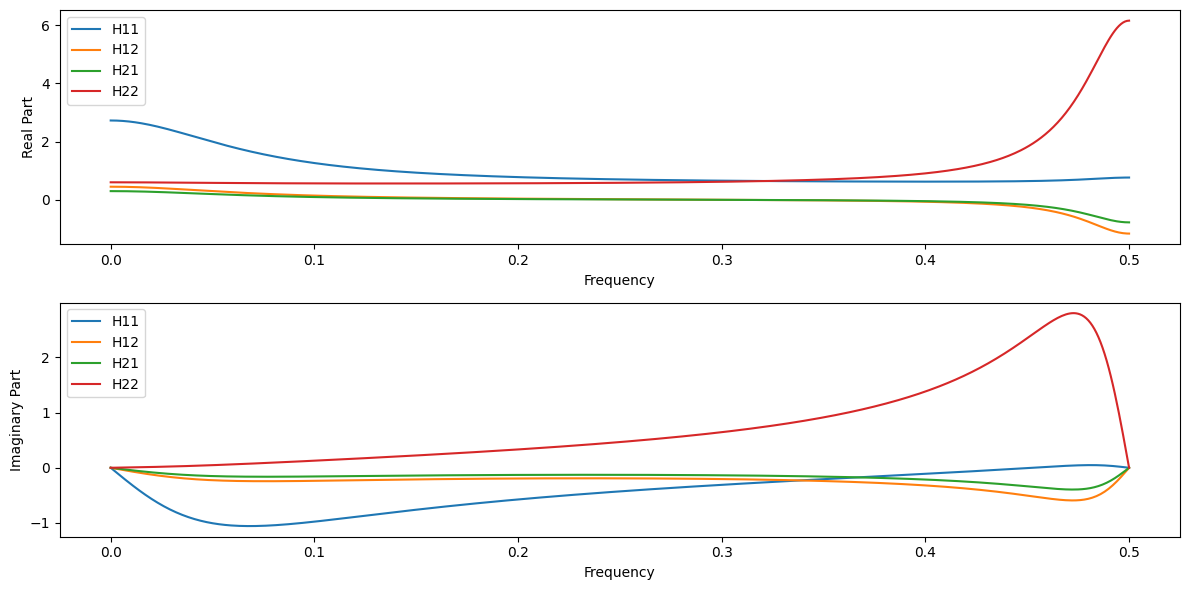

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 MVAR(1) 系数矩阵 A1
A1 = np.array([[0.6, 0.3],
               [0.2, -0.8]])

# 定义频率范围
frequencies = np.linspace(0, 0.5, 500)

# 初始化一个空的传递函数矩阵
H = np.zeros((len(frequencies), 2, 2), dtype=complex)

# 计算传递函数 H(f) 的值
for i, f in enumerate(frequencies):
    A1_exp = A1 * np.exp(-1j * 2 * np.pi * f)
    I_minus_A1_exp = np.eye(2) - A1_exp
    H[i] = np.linalg.inv(I_minus_A1_exp)

# 提取 H(f) 的实部和虚部
H_real = H.real
H_imag = H.imag

# 绘制传递函数 H(f) 的实部和虚部
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(frequencies, H_real[:, 0, 0], label='H11')
plt.plot(frequencies, H_real[:, 0, 1], label='H12')
plt.plot(frequencies, H_real[:, 1, 0], label='H21')
plt.plot(frequencies, H_real[:, 1, 1], label='H22')
plt.xlabel('Frequency')
plt.ylabel('Real Part')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(frequencies, H_imag[:, 0, 0], label='H11')
plt.plot(frequencies, H_imag[:, 0, 1], label='H12')
plt.plot(frequencies, H_imag[:, 1, 0], label='H21')
plt.plot(frequencies, H_imag[:, 1, 1], label='H22')
plt.xlabel('Frequency')
plt.ylabel('Imaginary Part')
plt.legend()

plt.tight_layout()
plt.show()
